In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import viz
import wrangle
import wrangle_mall

### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

In [2]:
# Acquiring the data using the wrangle
zillow_sql_query = wrangle.get_zillow_data()
# I am working with a copy of the SQL query to be able to access it faster
df = zillow_sql_query.copy()

In [3]:
zillow_sql_query.shape, df.shape

((77574, 68), (77574, 68))

In [4]:
# df.head().T

### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
df.shape

(77574, 68)

In [6]:
# df.dtypes

In [7]:
# round(df.describe().T, 2)

In [8]:
# df.info

In [9]:
# what percentage of null values for every column.  weird that all my buildingclasstypeid
# are null after sql query, there were values before

df.isnull().sum()/len(df)*100

id                               0.000000
parcelid                         0.000000
airconditioningtypeid           67.764973
architecturalstyletypeid        99.734447
basementsqft                    99.935545
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.980664
buildingqualitytypeid           35.792920
calculatedbathnbr                0.792791
decktypeid                      99.208498
finishedfloor1squarefeet        92.220332
calculatedfinishedsquarefeet     0.257818
finishedsquarefeet12             4.711630
finishedsquarefeet13            99.945858
finishedsquarefeet15            96.097919
finishedsquarefeet50            92.220332
finishedsquarefeet6             99.502411
fips                             0.000000
fireplacecnt                    89.317297
fullbathcnt                      0.792791
garagecarcnt                    67.106247
garagetotalsqft                 67.106247
hashottuborspa                  98

In [10]:
df.isnull().sum()

id                                  0
parcelid                            0
airconditioningtypeid           52568
architecturalstyletypeid        77368
basementsqft                    77524
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             77559
buildingqualitytypeid           27766
calculatedbathnbr                 615
decktypeid                      76960
finishedfloor1squarefeet        71539
calculatedfinishedsquarefeet      200
finishedsquarefeet12             3655
finishedsquarefeet13            77532
finishedsquarefeet15            74547
finishedsquarefeet50            71539
finishedsquarefeet6             77188
fips                                0
fireplacecnt                    69287
fullbathcnt                       615
garagecarcnt                    52057
garagetotalsqft                 52057
hashottuborspa                  76035
heatingorsystemtypeid           28005
latitude                            0
longitude   

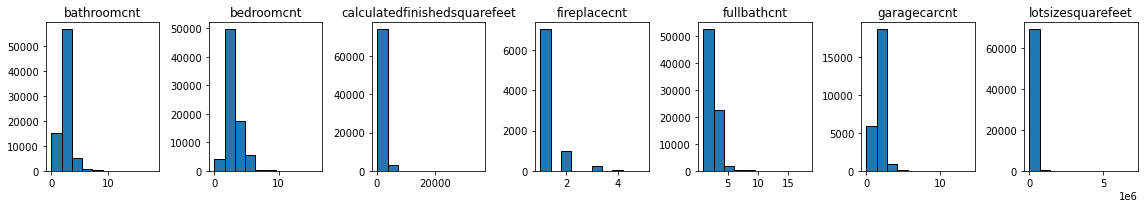

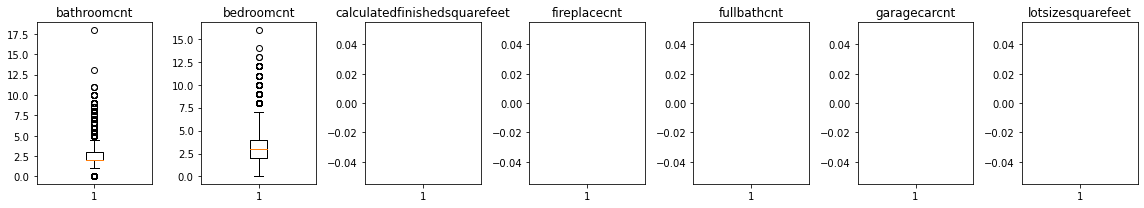

In [11]:
viz.histograms1(df)

The "easy" attributes (beds, baths, garages) are mostly normally distributed with some modestly significant outliers However, some, such as sq_ft and lot_size have some massively outlying data to be dealt with

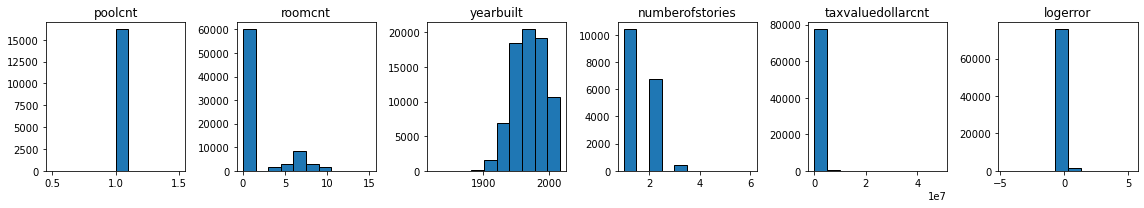

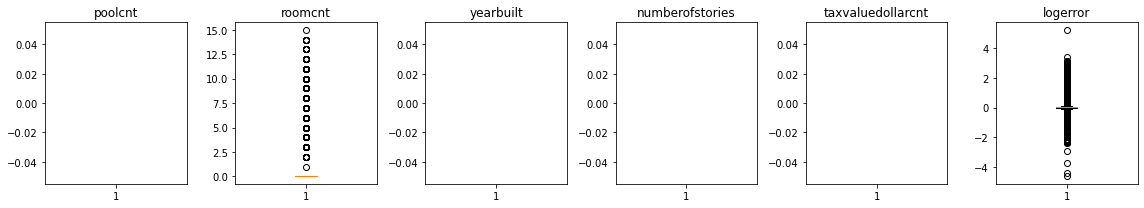

In [12]:
viz.histograms2(df)

Similar here (year_built and room count are normal--assuming the 0 values are actually 1 or null...) Tax value has some massive outliers. Logerror...needs to be looked into more closely

In [13]:
# How many nulls have in each row?
# ...as in... 11995 rows have 33 nulls?
df.isnull().sum(axis =1).value_counts()

33    14817
34    13356
32    12606
31     9911
36     5793
29     5285
35     5163
37     3630
30     3465
38     1932
28      457
27      316
39      285
40      230
44       79
26       65
45       50
41       29
43       29
42       26
25       24
24       13
46        5
47        3
48        3
23        2
dtype: int64

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [14]:
def missing_values_col_wise(df):
    '''
    Function that takes in a df and returns a list of attributes with the number and percent
    of missing values for that attribute.
    '''
    new_df = pd.DataFrame(df.isnull().sum())
    new_df['number_missing'] = df.isnull().sum()
    new_df['percent_missing'] = df.isnull().sum()/len(df)*100
    new_df.drop([0], axis=1, inplace=True)
    return new_df

In [15]:
missing_cols = missing_values_col_wise(df)
missing_cols

,number_missing,percent_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52568,67.764973
architecturalstyletypeid,77368,99.734447
basementsqft,77524,99.935545
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77559,99.980664
buildingqualitytypeid,27766,35.792920
calculatedbathnbr,615,0.792791


### Takeaways, missing values: 
Drop all columns over 50% except...
- pool count: i think pool count is 0 unless otherwise specified
- fireplace count: same
- unit count...see below

### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [16]:
def missing_values_row_wise(df):
    '''
    Function that takes in a df and returns a list of rows with the number and percent
    of missing values.
    '''
    new_df = pd.DataFrame(df.isnull().sum(axis =1).value_counts())
    new_df['percent_missing'] = new_df.index/len(df.columns)*100
    new_df['num_of_rows'] = df.isnull().sum(axis =1).value_counts()
    new_df.drop([0], axis=1, inplace=True)
    new_df.index.rename('num_cols_missing_from_row', inplace = True)
    return new_df

In [17]:
missing_rows = missing_values_row_wise(df)
missing_rows

,percent_missing,num_of_rows
num_cols_missing_from_row,,
33,48.529412,14817
34,50.000000,13356
32,47.058824,12606
31,45.588235,9911
36,52.941176,5793
29,42.647059,5285
35,51.470588,5163
37,54.411765,3630
30,44.117647,3465


### Takeaways, missing values row-wise: let's drop everything above fifty percent...actually, first let's drop columns and repeat process.

## Prepare

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [18]:
df.unitcnt.value_counts()

1.0      47412
2.0       2031
4.0        726
3.0        529
42.0         1
237.0        1
45.0         1
6.0          1
Name: unitcnt, dtype: int64

Start by removing anything above 1.0 units

In [19]:
df.bedroomcnt.value_counts()

3.0     30435
2.0     19222
4.0     17549
5.0      4550
1.0      3391
6.0      1000
0.0       836
8.0       253
7.0       208
9.0        70
10.0       31
12.0       16
11.0        9
13.0        2
14.0        1
16.0        1
Name: bedroomcnt, dtype: int64

<AxesSubplot:>

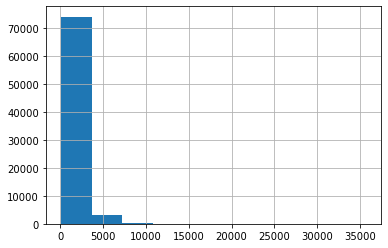

In [20]:
df.calculatedfinishedsquarefeet.hist()

In [21]:
# look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

1.0      47412
NaN      26872
2.0       2031
4.0        726
3.0        529
42.0         1
237.0        1
45.0         1
6.0          1
Name: unitcnt, dtype: int64

In [22]:
# (df.calculatedfinishedsquarefeet/df.bedroomcnt).hist()

In [23]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

df.shape

(71355, 68)

In [24]:
def handle_missing_values(df, prop_required_row, prop_required_col):
    ''' function which takes in a dataframe, proportion of non-null rows and columns
    (respectively) required to prevent the columns and rows being dropped:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [25]:
df = handle_missing_values(df, .7, .5)

In [26]:
df.shape

(71355, 34)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71355 entries, 0 to 77573
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71355 non-null  int64  
 1   parcelid                      71355 non-null  int64  
 2   bathroomcnt                   71355 non-null  float64
 3   bedroomcnt                    71355 non-null  float64
 4   buildingqualitytypeid         44841 non-null  float64
 5   calculatedbathnbr             71340 non-null  float64
 6   calculatedfinishedsquarefeet  71355 non-null  float64
 7   finishedsquarefeet12          71188 non-null  float64
 8   fips                          71355 non-null  float64
 9   fullbathcnt                   71340 non-null  float64
 10  heatingorsystemtypeid         46412 non-null  float64
 11  latitude                      71355 non-null  float64
 12  longitude                     71355 non-null  float64
 13  l

In [28]:
df.heatingorsystemdesc.value_counts(dropna=False)

Central       31357
NaN           24943
Floor/Wall    13229
Yes             850
Forced air      775
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [29]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc'
       ,'regionidcounty', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt']

In [30]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [31]:
df = remove_columns(df,cols_to_remove)
df.shape

(71355, 23)

In [32]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedfinishedsquarefeet        0
fips                                0
fullbathcnt                        15
latitude                            0
longitude                           0
lotsizesquarefeet                8034
rawcensustractandblock              0
regionidcity                     1322
regionidzip                        40
roomcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24943
dtype: int64

In [33]:
df.heatingorsystemdesc.value_counts(dropna = False)

Central       31357
NaN           24943
Floor/Wall    13229
Yes             850
Forced air      775
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [34]:
# not sure i agree that there are so many homes lacking heat in southern CA
# but i do agree the attribute should be dropped

df.drop(columns = 'heatingorsystemdesc', inplace = True)

In [35]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedfinishedsquarefeet        0
fips                                0
fullbathcnt                        15
latitude                            0
longitude                           0
lotsizesquarefeet                8034
rawcensustractandblock              0
regionidcity                     1322
regionidzip                        40
roomcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
dtype: int64

In [36]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbers = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26514
8.0     13404
6.0     12673
4.0      8226
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [37]:
missing_values_col_wise(df)

,number_missing,percent_missing
parcelid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,26514,37.157873
calculatedfinishedsquarefeet,0,0.000000
fips,0,0.000000
fullbathcnt,15,0.021022
latitude,0,0.000000
longitude,0,0.000000
lotsizesquarefeet,8034,11.259197


In [38]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [39]:
# should I fill missing values for buildingqualitytypeid with median value?
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [40]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
fullbathcnt                       15
latitude                           0
longitude                          0
lotsizesquarefeet               8034
rawcensustractandblock             0
regionidcity                    1322
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

<AxesSubplot:>

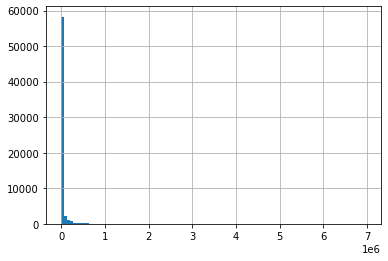

In [41]:
# look at lot-size distribution
df.lotsizesquarefeet.hist(bins = 100)

A few massive lots skewing the distribution

In [42]:
# median lot size?
df.lotsizesquarefeet.median()

7313.0

In [43]:
df.lotsizesquarefeet.fillna(7313,inplace=True)

In [44]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
fullbathcnt                       15
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

In [45]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [46]:
df.shape

(69904, 22)

In [47]:
df.head(5).T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34185120.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118414640.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,278581.0


In [48]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

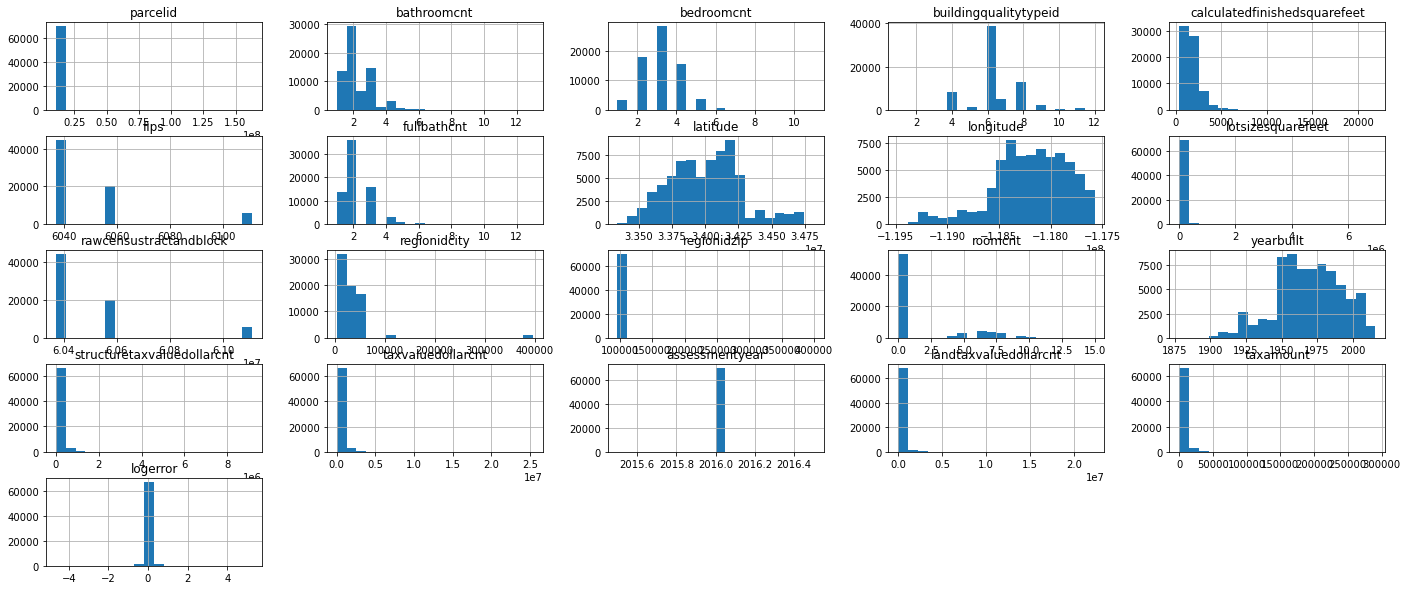

In [49]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout;

In [50]:
# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69714, 22)

In [51]:
# Function to read and wrangle data:

def wrangle_zillow():
    df = pd.read_csv('zillow_df.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df,.7,.5
                              )
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc'
       ,'regionidcounty', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt'])


#     replace nulls in unitcnt with 1
#     df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
#     df.heatingorsystemdesc.fillna('None', inplace = True)

    # actually, I'm not assuming this, and I am dropping the heatingsystem col
    df.drop(columns = 'heatingorsystemdesc', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
    df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df = df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df

In [52]:
df = wrangle_zillow()
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,14297519,3.5,4.0,6.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,1,17052889,1.0,2.0,6.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,2,14186244,2.0,3.0,6.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,3,12177905,3.0,4.0,8.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,4,10887214,3.0,3.0,8.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [53]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34185120.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118414640.0


In [54]:
df.shape

(69665, 24)

In [55]:
df.transactiondate.max()

'2017-09-25'

# RETURN TO THIS NOTEBOOK TO COMPLETE THE MALL DATA EXERCISES

In [56]:
sql = 'select * from customers'

In [57]:
# acquire data

mall_df = wrangle_mall.get_mall_customers(sql)

In [58]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [59]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [60]:
mall_df.shape

(200, 4)

In [61]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [62]:
mall_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [63]:
mall_df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

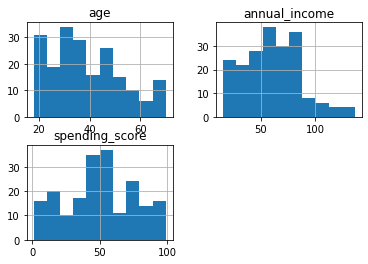

In [64]:
mall_df.hist()

<AxesSubplot:ylabel='spending_score'>

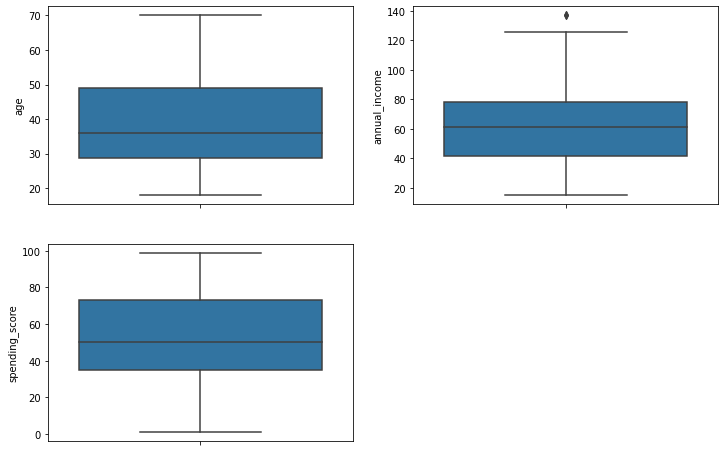

In [65]:
# visualize outliers using boxplots:
# why does my notebook require .pyplot? (and not ravinder's)


plt.pyplot.figure(figsize = (12,8))
plt.pyplot.subplot(221)
sns.boxplot(y = mall_df.age)

plt.pyplot.subplot(222)
sns.boxplot(y = mall_df.annual_income)

plt.pyplot.subplot(223)
sns.boxplot(y = mall_df.spending_score)

Not many outliers, just a little in income

In [66]:
# Calculate q1, q3 and iqr for income

q1 = mall_df.annual_income.quantile(0.25)
q3 = mall_df.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

132.75

In [67]:
mall_df.head()


,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [68]:
mall_df[mall_df.annual_income > upper_bound_income]

,gender,age,annual_income,spending_score
customer_id,,,,
199,Male,32,137,18
200,Male,30,137,83


In [69]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall_df = wrangle_mall.outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
mall_df.shape

(198, 4)

In [70]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [71]:
# encode the gender column

dummy_df = pd.get_dummies(mall_df.gender, drop_first=False)
dummy_df.head()

,Female,Male
customer_id,,
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0


### Encode

In [72]:
# concat the dummies df with original df. Drop the 'gender' column

mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
mall_df.head()

,age,annual_income,spending_score,Female,Male
customer_id,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


### Split

In [73]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
train.shape, validate.shape, test.shape

((118, 5), (40, 5), (40, 5))

### Scale

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns actually 4 items: mm_scaler, train_scaled_mm, valid_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [76]:
mall_df.select_dtypes('number')

,age,annual_income,spending_score,Female,Male
customer_id,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0
...,...,...,...,...,...
194,38,113,91,1,0
195,47,120,16,1,0
196,35,120,79,1,0


In [77]:
mall_df.columns

Index(['age', 'annual_income', 'spending_score', 'Female', 'Male'], dtype='object')

In [78]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [79]:
train_scaled.head()

,age,annual_income,spending_score,Female,Male
customer_id,,,,,
182,0.269231,0.738739,0.867347,1.0,0.0
49,0.211538,0.225225,0.418367,1.0,0.0
35,0.596154,0.162162,0.132653,1.0,0.0
186,0.230769,0.756757,0.979592,0.0,1.0
114,0.019231,0.441441,0.459184,0.0,1.0


In [80]:
train_scaled.shape

(118, 5)

In [82]:
# use the wrangle function:

train, validate, test = wrangle_mall.wrangle_mall_df()

In [83]:
#scaled the values
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [84]:
train_scaled.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0
